In [7]:
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Conv2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.callbacks import CSVLogger, LearningRateScheduler
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import time
import os, random
import pandas as pd

In [2]:
n_categories = 2
batch_size = 32
train_dir = './train'
validation_dir = './valid'
test_dir = './tests'
display_dir = './dis'
file_name = 'rate_const_01'
label = ['beer', 'wine']

train_datagen = ImageDataGenerator(rescale=1.0/255)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(56, 56),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(56, 56),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 2560 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(56, 56, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_categories-1))
model.add(Activation('sigmoid'))

model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 64)        1792      
                                                                 
 activation (Activation)     (None, 56, 56, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 28, 6

2022-01-24 16:29:07.039541: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-24 16:29:07.040343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
def step_decay(epoch):
    x = 0.1
    if epoch >= 50: x = 0.01
    if epoch >= 75: x = 0.001
    return x
lr_decay = LearningRateScheduler(step_decay)

model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics='accuracy')

In [5]:
hist = model.fit(
    train_generator,
    epochs=100,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[CSVLogger(file_name+'.csv')])

model.save(file_name+'.h5')

2022-01-24 16:29:17.443524: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-24 16:29:17.627087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
80/80 [==============================] - ETA: 0s - loss: 0.6738 - accuracy: 0.5824

2022-01-24 16:29:24.717768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 8s 99ms/step - loss: 0.6738 - accuracy: 0.5824 - val_loss: 0.5625 - val_accuracy: 0.8016
Epoch 2/100
80/80 [==============================] - 8s 96ms/step - loss: 0.6934 - accuracy: 0.5180 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/100
80/80 [==============================] - 8s 94ms/step - loss: 0.6690 - accuracy: 0.5930 - val_loss: 0.7015 - val_accuracy: 0.5000
Epoch 4/100
80/80 [==============================] - 8s 94ms/step - loss: 0.6945 - accuracy: 0.5008 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 5/100
80/80 [==============================] - 8s 94ms/step - loss: 0.6860 - accuracy: 0.5465 - val_loss: 0.6797 - val_accuracy: 0.5250
Epoch 6/100
80/80 [==============================] - 8s 96ms/step - loss: 0.6765 - accuracy: 0.5656 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 7/100
80/80 [==============================] - 7s 93ms/step - loss: 0.6691 - accuracy: 0.5727 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 8/100
80/80 

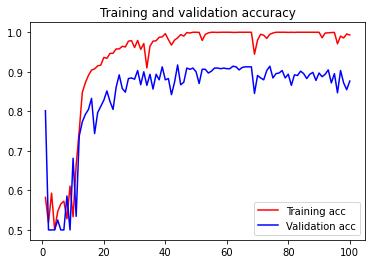

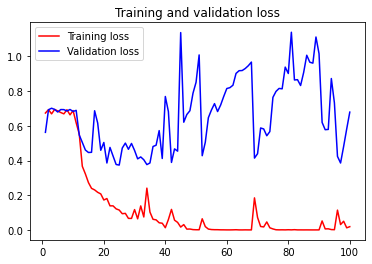

In [6]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
model.save('./', save_format='json')

INFO:tensorflow:Assets written to: ./assets


In [9]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(56, 56),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

score=model.evaluate_generator(test_generator)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])

#predict model and display images
files=os.listdir(display_dir)
img=random.sample(files,25)

plt.figure(figsize=(10,10))
for i in range(25):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])


plt.show()

Found 0 images belonging to 0 classes.


/opt/homebrew/Caskroom/mambaforge/base/envs/ohya/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/var/folders/t6/g40lkvln3ygcbm4lq1qqcp9h0000gn/T/ipykernel_56733/583359802.py:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score=model.evaluate_generator(test_generator)


ValueError: Asked to retrieve element 0, but the Sequence has length 0